In [1]:
import os
import pathlib
import xrtpy
import astropy.constants as const
import astropy.time
import sunpy.time
import astropy.units as u
import matplotlib.pyplot as plt
from sunpy.io.special import read_genx

from astropy.visualization import time_support
from astropy.utils.data import get_pkg_data_filename, get_pkg_data_filenames

In [10]:
fw = 'Be-thin'
date_start = "2006-09-22T22:45:45"
date_obs = '2020-11-09 18:00:00'

(0.0, 30.0)

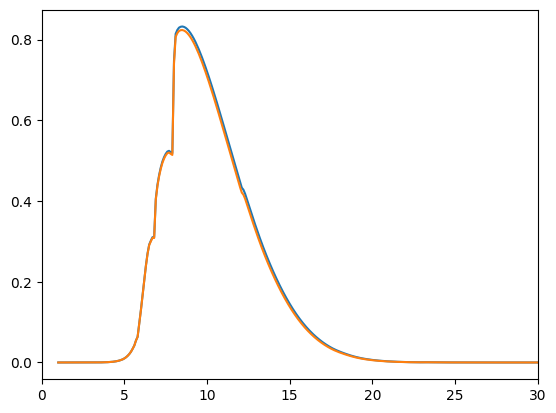

In [15]:
eaf = xrtpy.response.EffectiveAreaFundamental(fw, date_start)
resp = eaf.effective_area()
plt.plot(eaf.channel_wavelength, resp)
eaf = xrtpy.response.EffectiveAreaFundamental(fw, date_obs)
resp = eaf.effective_area()
plt.plot(eaf.channel_wavelength, resp)
plt.xlim(0,30)

(1e-28, 3e-25)

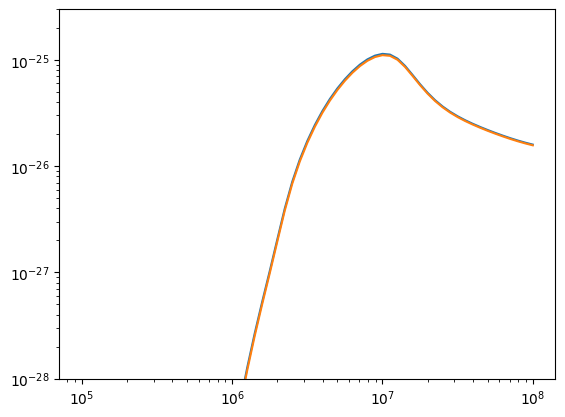

In [11]:
trf = xrtpy.response.TemperatureResponseFundamental(fw, date_start)
resp = trf.temperature_response()
plt.plot(trf.CHIANTI_temperature, resp)
trf = xrtpy.response.TemperatureResponseFundamental(fw, date_obs)
resp = trf.temperature_response()
plt.plot(trf.CHIANTI_temperature, resp)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-28, 3e-25)

In [7]:
filter = "Be-thin"
date_time = "2012-09-24T21:05:01"  # works fine
date_time = "2007-09-22T22:00:00"  # returns all NaNs
#date_time = "2007-09-22T22:00:01"  # works fine
eaf = xrtpy.response.EffectiveAreaFundamental(filter, date_time)
effective_area = eaf.effective_area()
#print(effective_area)

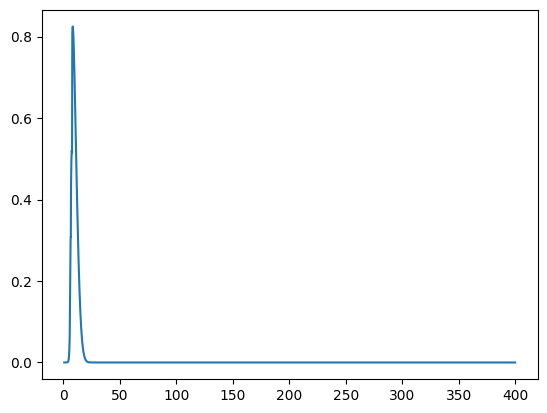

In [8]:
plt.plot(eaf.channel_wavelength, effective_area)

In [9]:
eaf.channel_geometry_aperture_area

<Quantity 2.28 cm2>

In [10]:
eaf.channel_transmission

array([1.2212352e-10, 3.4864622e-10, 9.0640206e-10, ..., 1.9138934e-40,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [11]:
eaf.interpolated_CCD_contamination_transmission

array([0.99999357, 0.99999151, 0.99998899, ..., 0.22604762, 0.22586558,
       0.22568188])

In [12]:
eaf.interpolated_filter_contamination_transmission

array([0.99999195, 0.99998938, 0.99998623, ..., 0.15522433, 0.15507358,
       0.15492148])

In [13]:
eaf.n_DEHP_wavelength

array([  1.00000001,   1.00787058,   1.01580299, ..., 399.786453  ,
       399.893227  , 400.        ])

In [14]:
eaf.contamination_on_CCD

array(475.90870776)

In [15]:
eaf.contamination_on_filter

array(595.45715332)

In [17]:
ccd_contam_time = xrtpy.response.effective_area._ccd_contamination_file_time
ccd_contam = xrtpy.response.effective_area._ccd_contamination

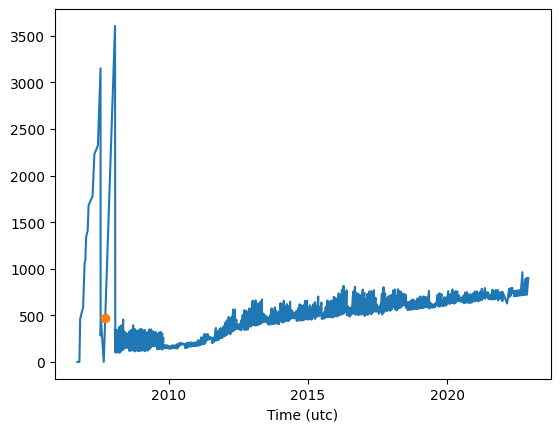

In [22]:
with time_support(format='jyear'):
    plt.plot(ccd_contam_time, ccd_contam)
    plt.plot(eaf.observation_date, eaf.contamination_on_CCD, marker='o', ls='', color='C1')

In [105]:
contam_dates = astropy.time.Time(epoch, scale='utc') + (ccd_contam_time - ccd_contam_time[0])*u.s

In [110]:
contam_dates_2 = astropy.time.Time(ccd_contam_time, format='utime', scale='utc')

In [114]:
contam_dates

(531,)

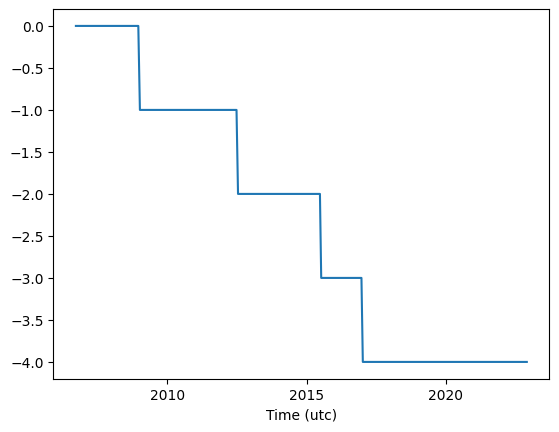

In [111]:
with time_support(format='jyear'):
    plt.plot(contam_dates,(contam_dates - contam_dates_2).to('s'))

In [116]:
astropy.time.Time.now().utime

1389631064.003046

In [64]:
xrtpy.response.effective_area._ccd_contam_file

{'p0': rec.array([(b'ver_2.0_08-DEC-2022', '')],
           dtype=[(('ver', 'VER'), 'O'), (('name', 'NAME'), 'O')]),
 'p1': array([8.74964160e+08, 8.77248742e+08, 8.78112742e+08, 8.81446587e+08,
        8.83129322e+08, 8.83952480e+08, 8.84855926e+08, 8.86636816e+08,
        8.87616011e+08, 8.92166411e+08, 8.94187810e+08, 8.98152610e+08,
        9.01184958e+08, 9.01267850e+08, 9.01788089e+08, 9.04813969e+08,
        9.17599342e+08, 9.17863309e+08, 9.18377452e+08, 9.18460331e+08,
        9.19585142e+08, 9.19671728e+08, 9.20794688e+08, 9.20859602e+08,
        9.22608906e+08, 9.22695147e+08, 9.24426612e+08, 9.24516002e+08,
        9.26846282e+08, 9.26932923e+08, 9.28057829e+08, 9.28144802e+08,
        9.29866488e+08, 9.29959205e+08, 9.31686425e+08, 9.31752004e+08,
        9.33928432e+08, 9.33998405e+08, 9.35921134e+08, 9.35985605e+08,
        9.38166819e+08, 9.38232004e+08, 9.40158385e+08, 9.40201625e+08,
        9.41966960e+08, 9.42010145e+08, 9.43783876e+08, 9.43827425e+08,
        9.455

In [25]:
files = []
data_root = 'data/temperature_response_IDL_testing_files/'
for top_dir in get_pkg_data_filenames(data_root, package='xrtpy.response.tests', ):
    files += list(get_pkg_data_filenames(top_dir, package='xrtpy.response.tests', pattern='*.txt'))

In [121]:
astropy.time.Time(os.path.getmtime(xrtpy.response.effective_area._ccd_contam_filename), format='unix').iso

'2023-01-13 15:13:22.842'

In [122]:
eaf.xrt_contam_on_ccd_geny_update

'2023/01/13'

## Sandbox

In [39]:
_key = 'Be-thin'
#date = astropy.time.Time('2006-09-22T22:00:00')
date = "2007-09-22T22:00:00"
trf = xrtpy.response.TemperatureResponseFundamental(_key, date)
ea = trf.effective_area()
gain = const.c * const.h / trf.channel_wavelength / trf.ev_per_electron / trf.ccd_gain_right
# NOTE: the xrtpy package makes use of the new unit in astropy DN which is much more commonly used
# in solar physics. However, DN is not a unit recognized in the FITS standard so we substitute it 
# for count. This is currently the unit that we use in sunpy in place of DN.
gain = gain * u.count / u.DN
response = ea * gain * trf.solid_angle_per_pixel
# NOTE: This is somewhat confusingly in units of ph Angstroms
wavelength = trf.channel_wavelength.to_value('ph Angstrom') * u.angstrom       

In [37]:
ea

<Quantity [2.78436589e-10, 7.94894359e-10, 2.06653262e-09, ...,
           6.62848519e-42, 0.00000000e+00, 0.00000000e+00] cm2>

In [2]:
xrtpy.response.EffectiveAreaFundamental('Al-poly', "2007-09-22T22:00:00")

/Users/wtbarnes/mambaforge/envs/xrtpy-dev/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/wtbarnes/mambaforge/envs/xrtpy-dev/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


<Quantity [nan, nan, nan, ..., nan, nan, nan] cm2>